In [1]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics
import pandas as pd

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [2]:
ro = 8. #distance to Galactic centre in kpc, scales distances
vo = 220. #circular velocity at solar circle
to=conversion.time_in_Gyr(ro=ro,vo=vo)
mo=conversion.mass_in_msol(ro=ro,vo=vo)
tdisrupt=3
mass = 1e7
    
sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
o.turn_physical_off()

In [3]:
pot14 = graphics.lmc_potential_wacc(10, pot=MWPotential2014)

In [4]:
ts = np.linspace(0,-1/to,1000)
o.integrate(ts, pot=pot14)

In [6]:
#o_lmc1, oall_lmc1, dtall_lmc1 = graphics.streamorbitslmc_acc(mass/10, o, 3, pot=MWPotential2014, nstar=500)

In [8]:
#o_lmc2, oall_lmc2, dtall_lmc2 = graphics.streamorbitslmc_acc(mass/10, o, 1, pot=MWPotential2014, nstar=500)

In [9]:
#o_lmc3, oall_lmc3, dtall_lmc3 = graphics.streamorbitslmc_acc(mass, o, 3, pot=MWPotential2014, nstar=500)

In [10]:
#o_lmc4, oall_lmc4, dtall_lmc4 = graphics.streamorbitslmc_acc(mass, o, 1, pot=MWPotential2014, nstar=500)

In [16]:
import pickle
file_streams = open('lmc_stream_models_dif_t.obj', 'wb')

streams_dict = {
    "MW14 1E6 3Gyr" : oall_lmc1,
    "MW14 1E6 1Gyr" : oall_lmc2,
    "MW14 1E7 3Gyr" : oall_lmc3,
    "MW14 1E7 1Gyr" : oall_lmc4,
    "MW14 1E6 8Gyr" : oall_lmc5
#    "MCM17 5*1E7" : oall_lmc172,
#    "MCM17 2.5*1E6" : oall_lmc173
}

#pickle.dump(streams_dict, file_streams)
file_streams.close()

NameError: name 'oall_lmc1' is not defined

In [17]:
import pickle
filehandler = open('lmc_stream_models_dif_t.obj', 'rb') 
obj = pickle.load(filehandler)

oall_lmc1 = obj.get("MW14 1E6 3Gyr")
oall_lmc2 = obj.get("MW14 1E6 1Gyr")
oall_lmc3 = obj.get("MW14 1E7 3Gyr")
oall_lmc4 = obj.get("MW14 1E7 1Gyr")

EOFError: Ran out of input

In [5]:
import pandas as pd
styx_radec = pd.read_csv(r"styx_radec.csv")
styx_trace = pd.read_csv(r"styx_trace.csv")

In [6]:
styx_ra = styx_radec.ra.to_list()
styx_dec = styx_radec.dec.to_list()

styx_tra = styx_trace.ra.to_list()
styx_tdec = styx_trace.dec.to_list()

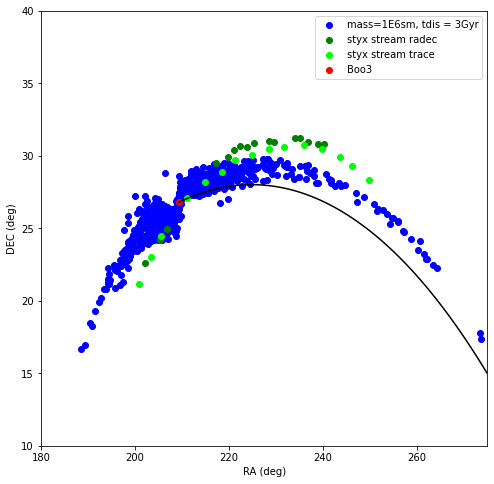

In [19]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc1.ra(), oall_lmc1.dec(), label='mass=1E6sm, tdis = 3Gyr', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

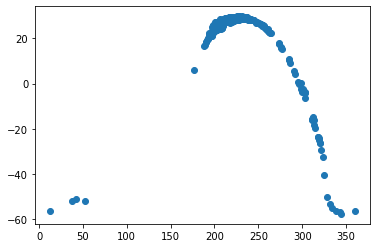

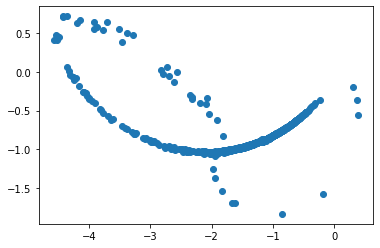

In [29]:
plt.scatter(oall_lmc1.ra(), oall_lmc1.dec())
plt.show()

plt.scatter(oall_lmc1.pmra(), oall_lmc1.pmdec())

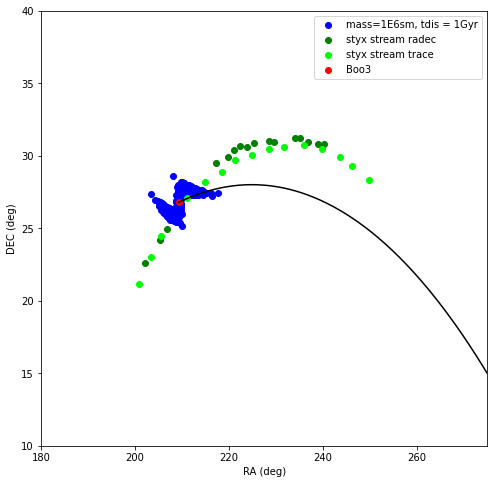

In [20]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc2.ra(), oall_lmc2.dec(), label='mass=1E6sm, tdis = 1Gyr', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

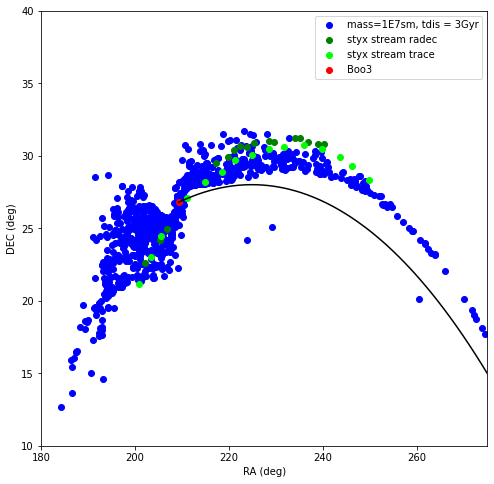

In [21]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc3.ra(), oall_lmc3.dec(), label='mass=1E7sm, tdis = 3Gyr', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

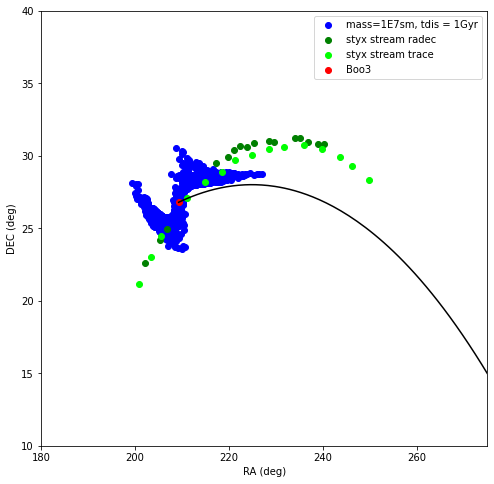

In [22]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc4.ra(), oall_lmc4.dec(), label='mass=1E7sm, tdis = 1Gyr', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

In [7]:
#o_lmc5, oall_lmc5, dtall_lmc5 = graphics.streamorbitslmc_acc(mass, o, 8, pot=MWPotential2014, nstar=500)

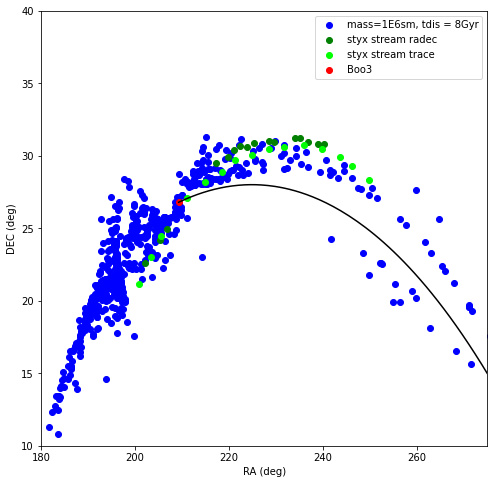

In [10]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc5.ra(), oall_lmc5.dec(), label='mass=1E6sm, tdis = 8Gyr', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

In [12]:
import pickle
filehandler = open('lmc_stream_models_N500.obj', 'rb') 
obj = pickle.load(filehandler)

oall_lmc16 = obj.get("MW14 1E6")
oall_lmc56 = obj.get("MW14 5E6")
oall_lmc17 = obj.get("MW14 1E7")
oall_lmc57 = obj.get("MW14 5E7")

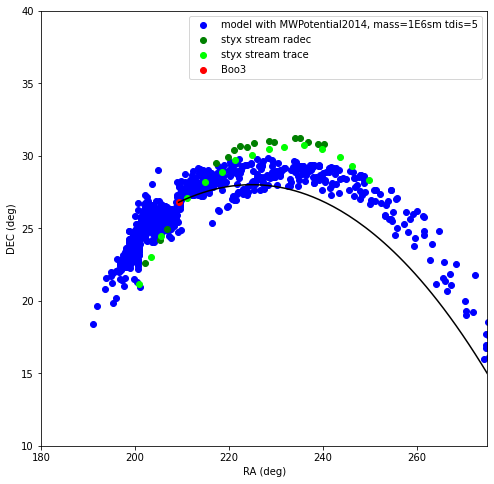

In [26]:
fig = plt.figure(figsize=(8,8))

plt.scatter(oall_lmc16.ra(), oall_lmc16.dec(), label='model with MWPotential2014, mass=1E6sm tdis=5', c='blue')
plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
plt.scatter(o.ra(),o.dec(),label='Boo3', c='red')
plt.plot(o.ra(ts), o.dec(ts), 'k-')
plt.xlim(180,275)
plt.ylim(10,40)

plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
plt.show()

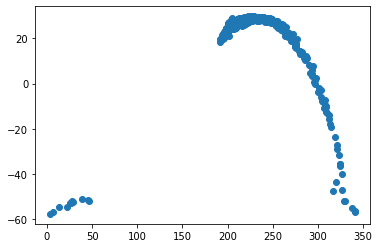

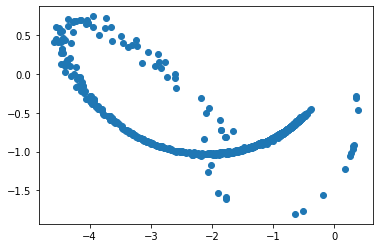

In [28]:
plt.scatter(oall_lmc16.ra(), oall_lmc16.dec())
plt.show()

plt.scatter(oall_lmc16.pmra(), oall_lmc16.pmdec())